In [17]:
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
import numpy as np
import math

from sympy.logic import POSform, SOPform
from sympy import symbols

symA = 'a0 a1 a2 a3 a4 a5 a6 a7 a8 a9 a10 a11 a12 a13 a14 a15'
symB = 'b0 b1 b2 b3 b4 b5 b6 b7 b8 b9 b10 b11 b12 b13 b14 b15'

a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15 = symbols(symA)
b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15 = symbols(symB)

A = [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15]

B = [b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15]



In [18]:
def toBin (val, size):
    return list(reversed(list(map(lambda x: int(x),'{:0{}b}'.format(val, size)))))


In [19]:
def build_X_y(NBITS, idxOfBitToEncode, hypothesis):
    X = []
    y = []
    for v1 in range(2**NBITS):
        binv1 = toBin(v1, NBITS)
        include = True
        for hyp in hypothesis:
            if binv1[hyp[0]] != hyp[1]:
                include = False
                break
        if not include:
            continue
        mathval1 = round(math.sqrt(v1))
        binval1 = toBin(mathval1, NBITS)
        targetbit = binval1[idxOfBitToEncode]
        print(v1, binv1, mathval1, binval1, targetbit)
        X.append(binv1)
        y.append(targetbit)
    print(X)
    print(y)
    return X, y

In [20]:
def display_tree(tree):
    r = export_text(tree) # , feature_names = ["a", "b"])
    print (r)

In [21]:
NBITS = 4
idxOfBitToEncode = 2
hypothesis = [[3,1]]  # Example hypothesis to filter inputs

X, y = build_X_y(NBITS, idxOfBitToEncode, hypothesis)
if len(y) == 1:
    print ("coucou")

8 [0, 0, 0, 1] 3 [1, 1, 0, 0] 0
9 [1, 0, 0, 1] 3 [1, 1, 0, 0] 0
10 [0, 1, 0, 1] 3 [1, 1, 0, 0] 0
11 [1, 1, 0, 1] 3 [1, 1, 0, 0] 0
12 [0, 0, 1, 1] 3 [1, 1, 0, 0] 0
13 [1, 0, 1, 1] 4 [0, 0, 1, 0] 1
14 [0, 1, 1, 1] 4 [0, 0, 1, 0] 1
15 [1, 1, 1, 1] 4 [0, 0, 1, 0] 1
[[0, 0, 0, 1], [1, 0, 0, 1], [0, 1, 0, 1], [1, 1, 0, 1], [0, 0, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1]]
[0, 0, 0, 0, 0, 1, 1, 1]


In [23]:
theThree = DecisionTreeClassifier().fit(X, y) # max_depth=2


In [24]:

display_tree(theThree)

|--- feature_2 <= 0.50
|   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 1



[Text(0.4, 0.875, 'x[2] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.375, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

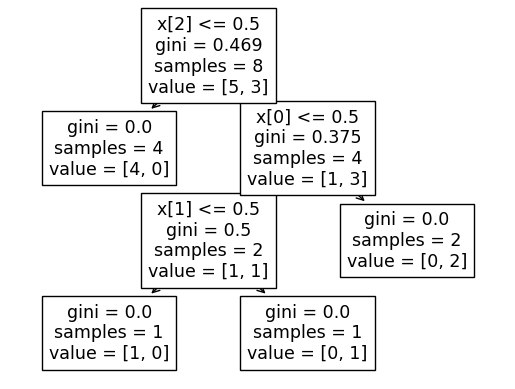

In [16]:
tree.plot_tree(theThree)

In [35]:
import json
def read_abstree_from_json():
    with open("work/abstree.json", "r") as fic_in:
        abstree = json.load(fic_in)
    return abstree

abstree = read_abstree_from_json()

In [24]:
import os
print (os.listdir('work'))

['.ipynb_checkpoints', 'abstree.json', 'abstree.py', 'decisiontree.py', 'dt2code.py', 'ia', 'makelearn.py', 'oric', 'scatterpixel.py', 'tree2code.ipynb']


In [36]:
def abstree_to_python_code(abstree, indent=0):
    code_lines = []
    ind = '  ' * indent
    # Handle value assignment
    if 'value' in abstree:
        code_lines.append(f"{ind}{abstree['value']}")
    
    # If there is a subtree, process it recursively
    if 'subtree' in abstree:
        if 'feature' in abstree['subtree']:
            var = f"a{abstree['subtree']['feature']}"
            code_lines.append(f"{ind}if ({var} == 0):")
            code_lines += abstree_to_python_code(abstree['subtree']['left'], indent + 1)   
            code_lines.append(f"{ind}else:")     
            code_lines += abstree_to_python_code(abstree['subtree']['right'], indent + 1)        
        else:
            code_lines += abstree_to_python_code(abstree['subtree'], indent)
    else:
        # If there is a feature, handle it
        if 'feature' in abstree:
            var = f"a{abstree['feature']}"
            code_lines.append(f"{ind}if ({var} == 0):")
            code_lines += abstree_to_python_code(abstree['left'], indent + 1)
            code_lines.append(f"{ind}else:")
            code_lines += abstree_to_python_code(abstree['right'], indent + 1)
    return code_lines
### value subtree feature left right


In [ ]:
import importlib.util
def save_function_to_file(function_code, filename):
    with open(filename, 'w') as f:
        for line in function_code:
            f.write(line + '\n')

def load_and_run_function(filename):
    spec = importlib.util.spec_from_file_location("abstree_module", filename)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return getattr(module, "compute_r")

# Function to generate the code
def generate_function_code(abstree, indent=0):
    code_lines = ["def compute_r(a):",
                  "  [a0, a1, a2, a3] = a",
                  "  [r3, r2, r1, r0] = [0, 0, 0, 0]",
                #   '  print (f"a = {a}")'
                 ]  # Function header
    code_lines += abstree_to_python_code(abstree, indent=indent+1)
    code_lines.append(f"  r = [r0, r1, r2, r3]")
    code_lines.append(f"  return r")
    return code_lines


In [38]:
# Save the generated function to a file
function_code = generate_function_code(abstree)
save_function_to_file(function_code, 'work/abstree.py')


In [39]:

# Load and run the function
compute_r = load_and_run_function('work/abstree.py')

# Call the function
result = compute_r([0, 1, 0, 1])  # Example input
print(result)

[1, 1, 0, 0]


In [40]:
for v1 in range(2**NBITS):
    binv1 = toBin(v1, NBITS)
    mathval1 = round(math.sqrt(v1))
    binval1 = toBin(mathval1, NBITS)
    bf_result = compute_r(binv1)
    print(v1, binv1, binval1, bf_result, bf_result == binval1 )

0 [0, 0, 0, 0] [0, 0, 0, 0] [0, 0, 0, 0] True
1 [1, 0, 0, 0] [1, 0, 0, 0] [1, 0, 0, 0] True
2 [0, 1, 0, 0] [1, 0, 0, 0] [1, 0, 0, 0] True
3 [1, 1, 0, 0] [0, 1, 0, 0] [0, 1, 0, 0] True
4 [0, 0, 1, 0] [0, 1, 0, 0] [0, 1, 0, 0] True
5 [1, 0, 1, 0] [0, 1, 0, 0] [0, 1, 0, 0] True
6 [0, 1, 1, 0] [0, 1, 0, 0] [0, 1, 0, 0] True
7 [1, 1, 1, 0] [1, 1, 0, 0] [1, 1, 0, 0] True
8 [0, 0, 0, 1] [1, 1, 0, 0] [1, 1, 0, 0] True
9 [1, 0, 0, 1] [1, 1, 0, 0] [1, 1, 0, 0] True
10 [0, 1, 0, 1] [1, 1, 0, 0] [1, 1, 0, 0] True
11 [1, 1, 0, 1] [1, 1, 0, 0] [1, 1, 0, 0] True
12 [0, 0, 1, 1] [1, 1, 0, 0] [1, 1, 0, 0] True
13 [1, 0, 1, 1] [0, 0, 1, 0] [0, 0, 1, 0] True
14 [0, 1, 1, 1] [0, 0, 1, 0] [0, 0, 1, 0] True
15 [1, 1, 1, 1] [0, 0, 1, 0] [0, 0, 1, 0] True


In [43]:
import inspect
def uneFonction(a2, a1, a0):
    return [0, 1]

def deduce_fonction_prototype(fonction):
    nb_input = len (inspect.signature(fonction).parameters)
    fake_parametres = [0] * nb_input
    nb_output = len(fonction(*fake_parametres))
    print (f"function has {nb_input} parameter and outputs {nb_output} values")

deduce_fonction_prototype(uneFonction)

function has 3 parameter and outputs 2 values
